In [2]:
%%html
<style>
body {
    font-family: "Utopia", cursive, sans-serif;
}
</style>

In [1]:
import pandas as pd
import numpy as np
tempC=np.arange(0,110,10)
tempF=tempC*1.8+32
DF = pd.DataFrame({'  T⃞    e⃞    m⃞    p⃞    e⃞    r⃞    a⃞    t⃞    u⃞    r⃞    e⃞  C°🥵':tempC,'  T⃞    e⃞    m⃞    p⃞    e⃞    r⃞    a⃞    t⃞    u⃞    r⃞    e⃞  F°🥵':tempF})
DF

,T⃞ e⃞ m⃞ p⃞ e⃞ r⃞ a⃞ t⃞ u⃞ r⃞ e⃞ C°🥵,T⃞ e⃞ m⃞ p⃞ e⃞ r⃞ a⃞ t⃞ u⃞ r⃞ e⃞ F°🥵
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


['Daily Production Data', 'Monthly Production Data']


<Figure size 700x500 with 0 Axes>

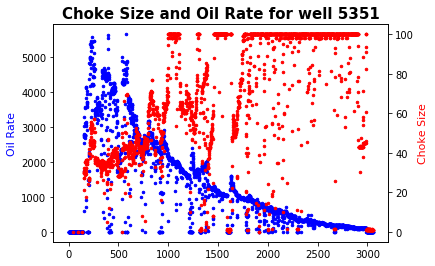

<Figure size 700x500 with 0 Axes>

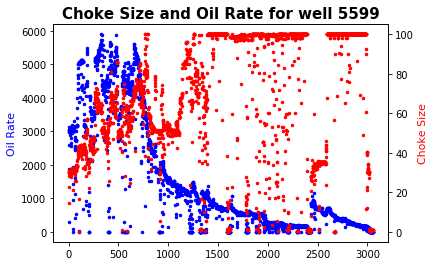

<Figure size 700x500 with 0 Axes>

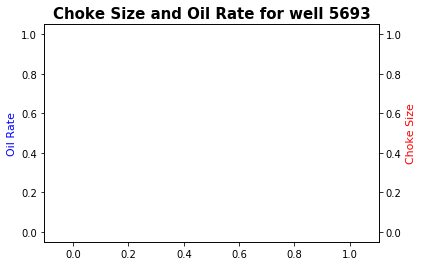

<Figure size 700x500 with 0 Axes>

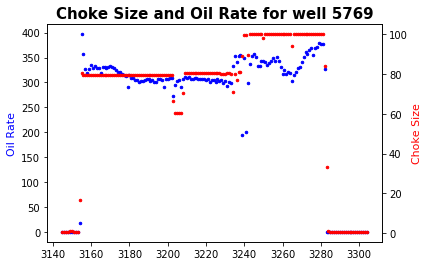

<Figure size 700x500 with 0 Axes>

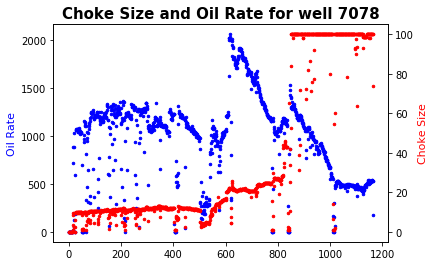

<Figure size 700x500 with 0 Axes>

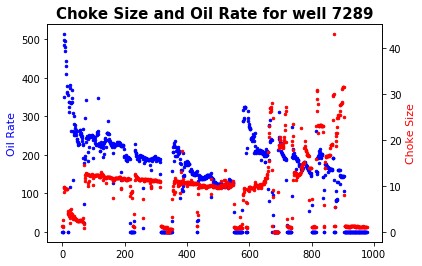

<Figure size 700x500 with 0 Axes>

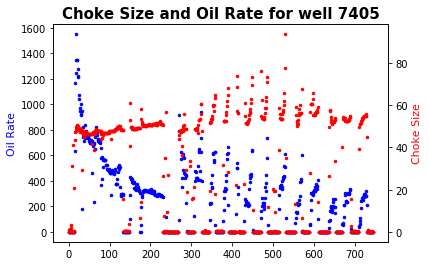

In [13]:
import sqlite3
import matplotlib.pyplot as plt
#importing volve daily prod data
xl = pd.ExcelFile('Volve production data.xlsx')
print(xl.sheet_names)
df1 = xl.parse('Daily Production Data')
#create volve production database
conn = sqlite3.connect("VolveProduction.db")
cur = conn.cursor()
#df1.to_sql("DailyRates", conn, if_exists="append", index = False)
conn.commit()
for NPD_WELL_BORE_CODE in (5351,5599,5693,5769,7078,7289,7405):
    testWellDF= pd.read_sql_query(f"SELECT AVG_CHOKE_SIZE_P, BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE={NPD_WELL_BORE_CODE};", conn)  
    currFig = plt.figure(figsize=(7,5), dpi=100)
    fig, ax1 = plt.subplots()
    ax2=ax1.twinx()
    ax1.plot(testWellDF['BORE_OIL_VOL'], color="blue", ls='None', marker='.', markersize=5,label = 'NPD_WELL_BORE_CODE '+str(NPD_WELL_BORE_CODE) )
    ax2.plot(testWellDF['AVG_CHOKE_SIZE_P'], color="red", ls='None', marker='.', markersize=5,label = 'NPD_WELL_BORE_CODE '+str(NPD_WELL_BORE_CODE) )
    ax1.set_title(f'Choke Size and Oil Rate for well {NPD_WELL_BORE_CODE}', fontsize=15, fontweight='bold')
    ax1.set_ylabel('Oil Rate', fontsize=11, color='b')
    ax2.set_ylabel('Choke Size', fontsize=11, color='r')